<a href="https://colab.research.google.com/github/rattakan06/229351-StatisticalLearning-or-Statistical-Learning-Labs/blob/main/229351_LAB01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 1 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ **เมื่อเสร็จแล้วให้ทำการ share** จากนั้นส่ง link มาใน mango canvas

ในขั้นตอนแรก ขอให้ download ไฟล์ที่

http://donlapark.pages.dev/229351/data/housing.csv

In [ ]:
import pandas as pd #dataframes
import numpy as np #matrices
import matplotlib.pyplot as plt #for plotting

%matplotlib inline

!wget http://donlapark.pages.dev/229351/data/housing.csv

housing = pd.read_csv("housing.csv")

housing.head(10)

--2025-06-26 02:10:57--  http://donlapark.pages.dev/229351/data/housing.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://donlapark.pages.dev/229351/data/housing.csv [following]
--2025-06-26 02:10:57--  https://donlapark.pages.dev/229351/data/housing.csv
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/csv]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.06s   

2025-06-26 02:10:57 (22.1 MB/s) - ‘housing.csv’ saved [1423529/1423529]



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


## Basic data exploration

In [ ]:
housing.shape

(20640, 10)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Which variable has missing data?

In [ ]:
housigh = housing.dropna()

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


from matplotlib import pyplot as plt
_df_0['longitude'].plot(kind='hist', bins=20, title='longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['latitude'].plot(kind='hist', bins=20, title='latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['housing_median_age'].plot(kind='hist', bins=20, title='housing_median_age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['total_rooms'].plot(kind='hist', bins=20, title='total_rooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='longitude', y='latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='latitude', y='housing_median_age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='housing_median_age', y='total_rooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='total_rooms', y='total_bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['longitude'].plot(kind='line', figsize=(8, 4), title='longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['latitude'].plot(kind='line', figsize=(8, 4), title='latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['housing_median_age'].plot(kind='line', figsize=(8, 4), title='housing_median_age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['total_rooms'].plot(kind='line', figsize=(8, 4), title='total_rooms')
plt.gca().spines[['top', 'right']].set_visible(False)

## Exercise 1

1. Download ไฟล์ข้อมูลที่
  http://donlapark.pages.dev/229351/data/Advertising.csv
  ซึ่งเป็นข้อมูลของผลการขายสินค้าอย่างหนึ่ง (Sales) กับการโฆษณาผ่านทาง TV, Radio, Newspaper
2. สร้าง dataframe ชื่อว่า **Ads** โดยใช้ข้อมูลชุดนี้
3. ดูข้อมูล 5 แถวแรกของ `Ads`
4. ตรวจสอบว่ามีข้อมูลที่หายไปหรือไม่
5. แสดงค่าสถิติพรรณนา (Descriptive statistics) ของตัวแปรต่างๆ

In [ ]:
# code here

In [ ]:
import pandas as pd #dataframes
import numpy as np #matrices
import matplotlib.pyplot as plt #for plotting

%matplotlib inline

!wget http://donlapark.pages.dev/229351/data/Advertising.csv

Advertising = pd.read_csv("Advertising.csv")

housing.head(5)

--2025-06-26 02:48:38--  http://donlapark.pages.dev/229351/data/Advertising.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://donlapark.pages.dev/229351/data/Advertising.csv [following]
--2025-06-26 02:48:38--  https://donlapark.pages.dev/229351/data/Advertising.csv
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3870 (3.8K) [text/csv]
Saving to: ‘Advertising.csv.1’

Advertising.csv.1   100%[===================>]   3.78K  --.-KB/s    in 0s      

2025-06-26 02:48:39 (49.5 MB/s) - ‘Advertising.csv.1’ saved [3870/3870]



,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
Advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
Advertising.max() , Advertising.min(), Advertising.mean(), Advertising.std()

(TV           296.4
 Radio         49.6
 Newspaper    114.0
 Sales         27.0
 dtype: float64,
 TV           0.7
 Radio        0.0
 Newspaper    0.3
 Sales        1.6
 dtype: float64,
 TV           147.0425
 Radio         23.2640
 Newspaper     30.5540
 Sales         14.0225
 dtype: float64,
 TV           85.854236
 Radio        14.846809
 Newspaper    21.778621
 Sales         5.217457
 dtype: float64)

Your answers here:

## Calling, indexing & modifying dataframes

In [ ]:
housing['longitude']

,longitude
0,-122.23
1,-122.22
2,-122.24
3,-122.25
4,-122.25
...,...
20635,-121.09
20636,-121.21
20637,-121.22
20638,-121.32


In [ ]:
housing['median_house_value']

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [ ]:
housing[['longitude','median_house_value']]

,longitude,median_house_value
0,-122.23,452600.0
1,-122.22,358500.0
2,-122.24,352100.0
3,-122.25,341300.0
4,-122.25,342200.0
...,...,...
20635,-121.09,78100.0
20636,-121.21,77100.0
20637,-121.22,92300.0
20638,-121.32,84700.0


In [ ]:
housing.loc[1:3]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [ ]:
housing.iloc[-10:]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
housing.loc[1:3,['longitude','median_house_value']]

,longitude,median_house_value
1,-122.22,358500.0
2,-122.24,352100.0
3,-122.25,341300.0


In [ ]:
housing.iloc[1:4,2:7]

,housing_median_age,total_rooms,total_bedrooms,population,households
1,21.0,7099.0,1106.0,2401.0,1138.0
2,52.0,1467.0,190.0,496.0,177.0
3,52.0,1274.0,235.0,558.0,219.0


## Basic statistics of a variable

In [ ]:
housing['total_bedrooms'].max()

6445.0

In [ ]:
housing['total_bedrooms'].min()

1.0

In [ ]:
housing['total_bedrooms'].median()

435.0

In [ ]:
print("Mean: ",housing["total_rooms"].mean())
print("Standard deviation: ",housing["total_rooms"].std())
print("Maximum: ",housing["total_rooms"].max())
print("Minimum: ",housing["total_rooms"].min())

In [ ]:
housing[["longitude", "latitude", "housing_median_age"]]

In [ ]:
housing.loc[0]

## Extracting a subset of dataframe

In [ ]:
housing.loc[1:3, ["longitude","latitude"]]

In [ ]:
housing.iloc[2:5,:]

## Selecting rows based on conditions

In [ ]:
housing[housing['total_bedrooms']>= 200 ]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
housing[(housing['longitude']>-122) & (housing['latitude']>=40)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1102,-121.54,40.06,17.0,858.0,262.0,47.0,27.0,2.4028,67500.0,INLAND
3345,-121.11,41.07,26.0,1707.0,308.0,761.0,250.0,2.7188,48100.0,INLAND
3346,-120.96,41.12,29.0,779.0,136.0,364.0,123.0,2.5000,59200.0,INLAND
3347,-121.07,40.85,17.0,976.0,202.0,511.0,175.0,3.6641,80800.0,INLAND
3348,-120.38,40.98,27.0,777.0,185.0,318.0,115.0,1.6833,40000.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
18823,-121.62,41.78,40.0,3272.0,663.0,1467.0,553.0,1.7885,43500.0,INLAND
18824,-121.93,41.86,28.0,4225.0,835.0,1908.0,686.0,1.7400,44000.0,INLAND
18858,-121.76,41.50,31.0,602.0,153.0,112.0,47.0,1.0667,34200.0,INLAND
19735,-121.80,40.34,26.0,4815.0,910.0,1341.0,539.0,2.8810,79800.0,INLAND


## Exercise 2

ในข้อต่อไปนี้ ให้นับแถวและคอลัมน์เริ่มจาก 0
1. แสดงค่าสูงสุดของข้อมูลที่อยู่ในแถวที่ 200-400 ของตัวแปร `total_bedrooms`
2. แสดง 3 คอลัมน์สุดท้ายของพื้นที่ที่มีจำนวนห้องนอน (`total_bedrooms`) มากกว่า 900 ห้อง

In [ ]:
# code here
housigh['total_bedrooms'].loc[200:400].max()

2048.0

In [ ]:
new_housing = housing[housigh['total_bedrooms'] > 900 ].iloc[-3:]

/tmp/ipython-input-94-3967497257.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_housing = housing[housigh['total_bedrooms'] > 900 ].iloc[-3:]


In [ ]:
new_housing

,TV,Radio,Newspaper,Sales
125,87.2,11.8,25.9,10.6
164,117.2,14.7,5.4,11.9
185,205.0,45.1,19.6,22.6


## Plotting

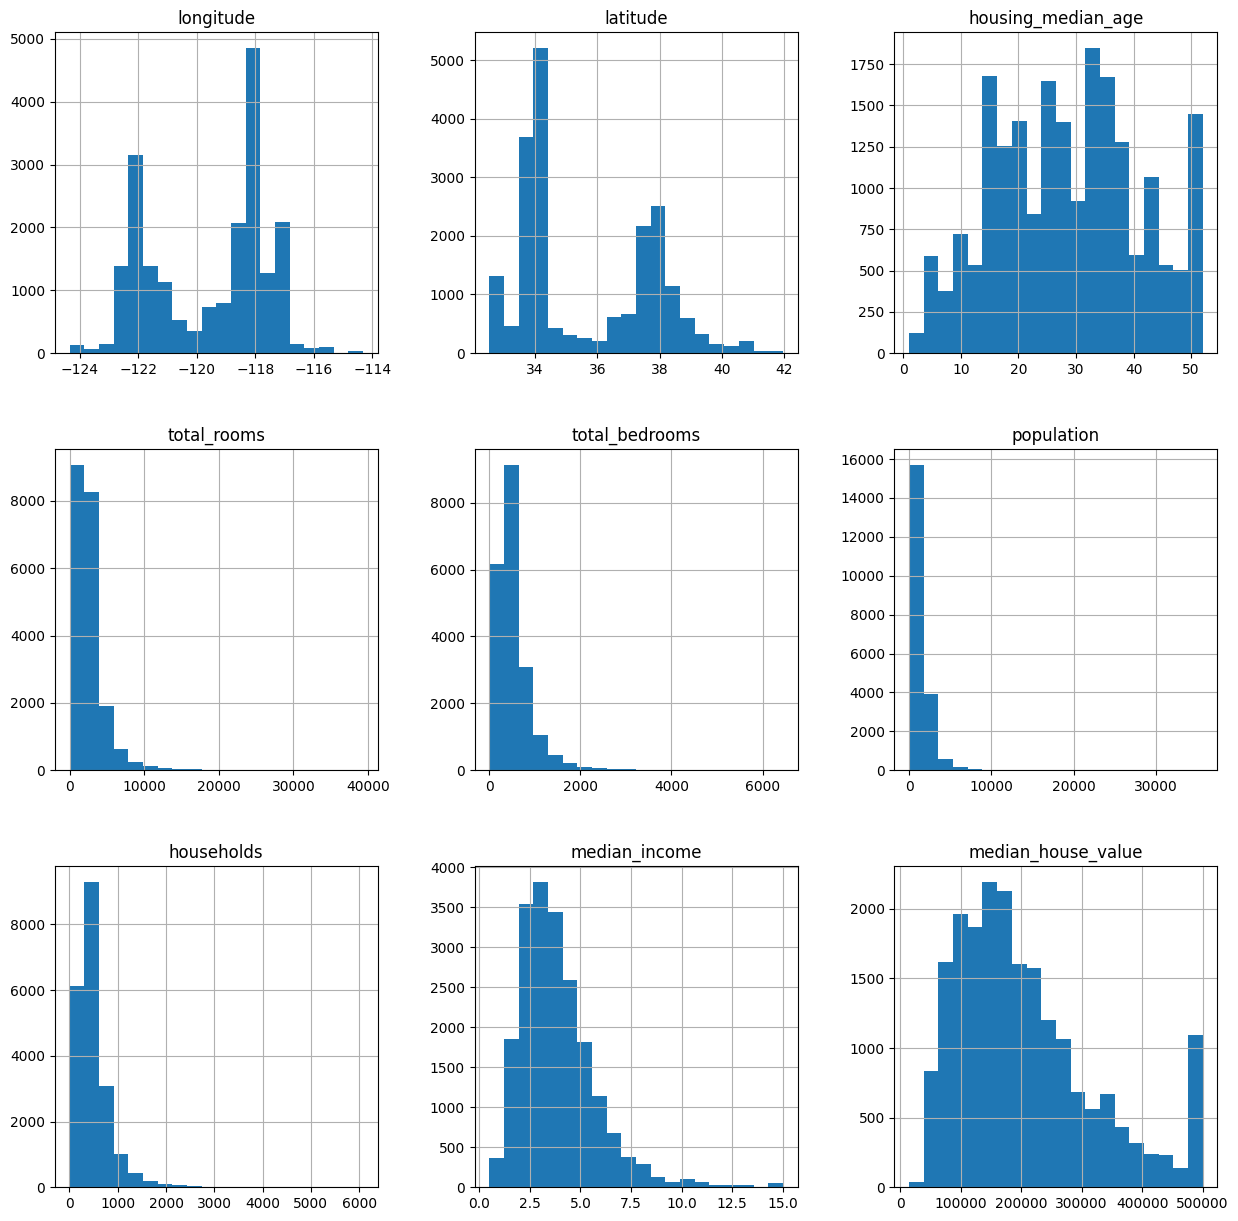

In [ ]:
housing.hist(bins=20, figsize=(15,15))
plt.show()

In [ ]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


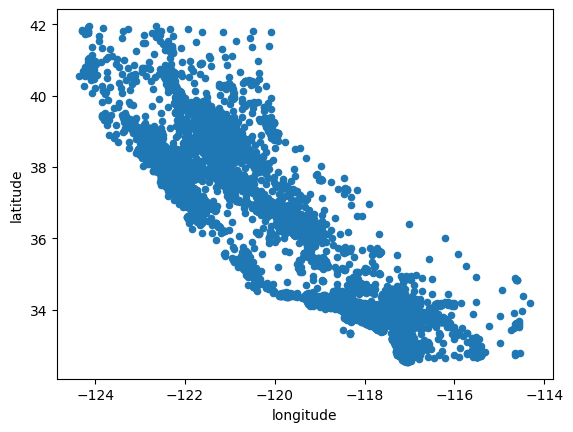

In [ ]:
housing.plot.scatter(x="longitude", y="latitude");

<Axes: xlabel='longitude', ylabel='latitude'>

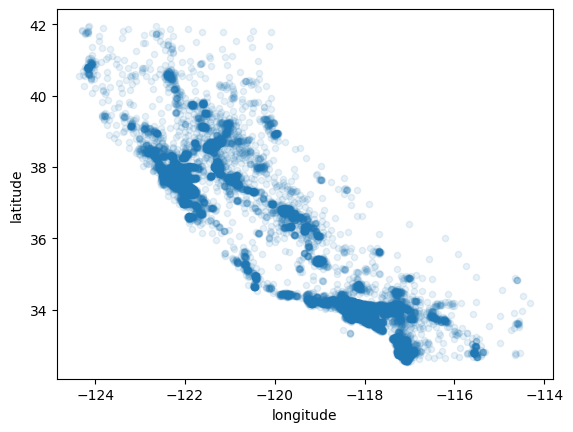

In [ ]:
housing.plot.scatter(x="longitude", y="latitude", alpha=0.1)

In [ ]:
corr_matrix = housing.iloc[:,:-1] .corr()

corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


### Grouping

พิจารณา Anscombe dataset ข้างล่างนี้

In [ ]:
import seaborn as sns

df = sns.load_dataset('anscombe')

In [ ]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [ ]:
groups = df.groupby('dataset')

In [ ]:
groups.get_group('I')

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [ ]:
groups.get_group('IV')

,dataset,x,y
33,IV,8.0,6.58
34,IV,8.0,5.76
35,IV,8.0,7.71
36,IV,8.0,8.84
37,IV,8.0,8.47
38,IV,8.0,7.04
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91


In [ ]:
groups.max()

,x,y
dataset,,
I,14.0,10.84
II,14.0,9.26
III,14.0,12.74
IV,19.0,12.50


In [ ]:
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


## Exercise 3

1. คำนวณค่า mean, standard deviation และ correlation matrix ของแต่ละกลุ่ม
2. สร้าง scatter plot ของแต่ละกลุ่มด้วย `groups.plot.scatter(...)`
3. จากข้อ 1 และข้อ 2 จงบอกว่าการศึกษาค่า summary statistics (mean, s.d., correlation) อย่างเดียวเพียงพอกับการศึกษาข้อมูลชุดหนึ่งหรือไม่ เพราะเหตุใด

In [ ]:
groups.mean() ,groups.std(),groups.corr()

(           x         y
 dataset               
 I        9.0  7.500909
 II       9.0  7.500909
 III      9.0  7.500000
 IV       9.0  7.500909,
                 x         y
 dataset                    
 I        3.316625  2.031568
 II       3.316625  2.031657
 III      3.316625  2.030424
 IV       3.316625  2.030579,
                   x         y
 dataset                      
 I       x  1.000000  0.816421
         y  0.816421  1.000000
 II      x  1.000000  0.816237
         y  0.816237  1.000000
 III     x  1.000000  0.816287
         y  0.816287  1.000000
 IV      x  1.000000  0.816521
         y  0.816521  1.000000)

<Axes: xlabel='x', ylabel='y'>

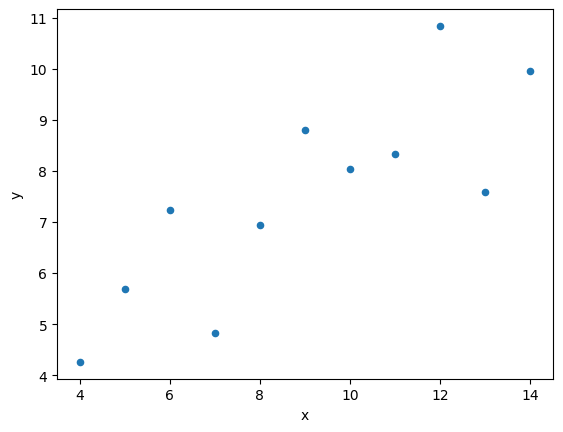

In [ ]:
groups.get_group('I').plot.scatter(x='x',y='y')

<Axes: xlabel='x', ylabel='y'>

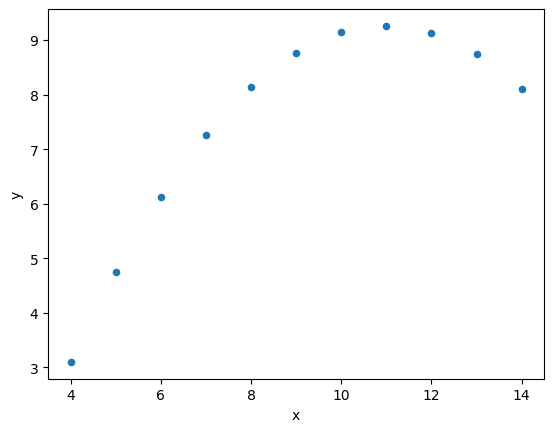

In [ ]:
groups.get_group('II').plot.scatter(x='x',y='y')

<Axes: xlabel='x', ylabel='y'>

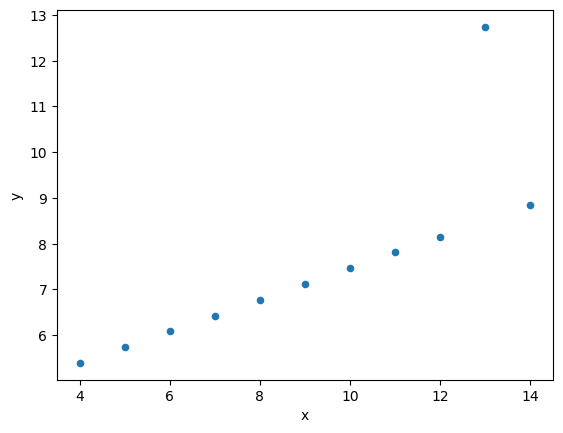

In [ ]:
groups.get_group('III').plot.scatter(x='x',y='y')

<Axes: xlabel='x', ylabel='y'>

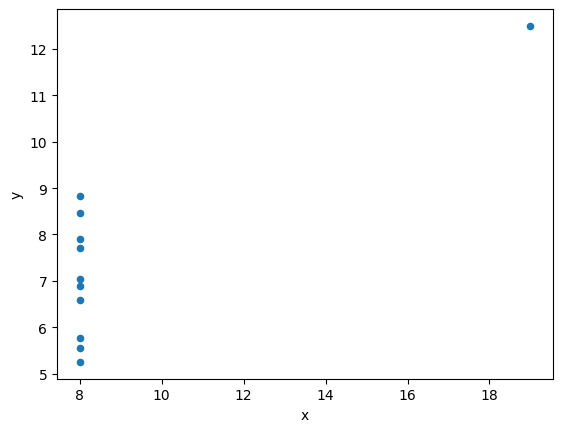

In [ ]:
groups.get_group('IV').plot.scatter(x='x',y='y')

จากข้อ1 และ 2 ข้อมูลเพียงพอสำหรับศึกษา แต่ถ้าจุดประสงค์ในการศึกษาอยู่นอกเหนือข้อมูลที่มีก็ต้องใช้ชุดข้อมูลสถิติอื่นมาช่วยมากกว่า